In [17]:
import pandas as pd  # Data handling
import matplotlib.pyplot as plt # visualization
from scipy.integrate import odeint # numerical integration
import numpy as np
import seaborn as sns
from pyvbmc import VBMC # VMBC object
from pyvbmc import VariationalPosterior
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy.integrate as integrate
import scipy.stats as scs

In [11]:
a_min = 0.0
a_max = 0.5
b_min = 1.0
b_max = 5.0
N = 10
Na = N
Nb = N

# reading in saved vps and their associated parameter values
param_values = np.loadtxt("param_values.csv")
vps = []
vbmcs = []
for i in range(len(param_values)):
    vps.append(VariationalPosterior.load("vp" + str(i) + ".pkl"))
    vbmcs.append(VariationalPosterior.load("vbmc" + str(i) + ".pkl"))


#unpack into appropriate 2d thing
# grid = np.zeros((Na,Nb))
# vps_2d = grid.tolist()
# params_2d = grid.tolist()
# count = 0
# for i,a in enumerate(np.linspace(a_min,a_max,Na)):  
#     for j,b in enumerate(np.linspace(b_min,b_max,Nb)):
#         vps_2d[i][j] = vps[count]
#         params_2d[i][j] = param_values[count]
#         count += 1

In [12]:
def euclidean_metric(vp,truth_array, n_samples = int(5e5),original = False): 
    """
    Returns a measure of how close the actual parameters are to the estimated parameters,
    computed by finding the euclidean distance between the mean of a large sample of the 
    varaitional posterior and the true values of the parameters.

    vp: varational posterior from PyVBMC
    truth_array: numpy array of the true values of the parameters (must be in the same order as the vp returns!)

    set original to true to respect the original distances
    """
    Xs, _ = vp.sample(n_samples) # sample vp
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(Xs)                     # fit scaler to samples
    scaled_data = scaler.transform(Xs) # scale samples
    mean = np.array([scaled_data[:,0].mean(),scaled_data[:,1].mean()]) # compute mean of samples
    truth_scaled = scaler.transform(truth_array) # scale true data
    if original:
        return np.linalg.norm(scaler.inverse_transform(mean-truth_scaled))
    else:
        return np.linalg.norm(mean-truth_scaled)
    
#pdf_simple = lambda x,y: vp.pdf(np.array([[y,x]]))
def CI_2D(vp,pdf,true_value,step = 0.05,n_samples = int(5e5)):
    # do sampling, take mode of samples
    Xs, _ = vp.sample(n_samples) # sample vp
    pdf_mode = scs.mode(Xs,keepdims = True)[0]
    #print("mode:",pdf_mode)
    #print("expectation",vp.moments())
    a0,b0 = pdf_mode[0][0] - step, pdf_mode[0][0] + step
    a1,b1 = pdf_mode[0][1] - step, pdf_mode[0][1] + step
    #print("a0, b0:", a0, b0, "a1, b1:", a1, b1)
    I = 0
    #print(true_value)
    def check_if_in_CI(true_value,a0,b0,a1,b1):
        if a0 <= true_value[0] <= b0 and a1 <= true_value[1] <= b1:
            #print("hit")
            return False
        else:
            return True
    iter = 0
    while check_if_in_CI(true_value,a0,b0,a1,b1):
        
        a0 -= step
        b0 += step
        a1 -= step
        b1 += step
        #print("iter",iter )
        iter += 1
        #print(I)
    I = integrate.dblquad(pdf, a0, b0, a1, b1)[0]
    return I

In [14]:
euclidean_grid = np.zeros((N,N))
count = 0
for i,a in enumerate(np.linspace(a_min,a_max,N)):     # a will be y axis in grid
    for j,b in enumerate(np.linspace(b_min,b_max,N)): # b will be x axis in grid
        euclidean_grid[i,j] = euclidean_metric(vps[count],np.atleast_2d(param_values[count]))
        print("vp" + str(count))
        count += 1

print(count)

vp0
vp1
vp2
vp3
vp4
vp5
vp6
vp7
vp8
vp9
vp10
vp11
vp12
vp13
vp14
vp15
vp16
vp17
vp18
vp19
vp20
vp21
vp22
vp23
vp24
vp25
vp26
vp27
vp28
vp29
vp30
vp31
vp32
vp33
vp34
vp35
vp36
vp37
vp38
vp39
vp40
vp41
vp42
vp43
vp44
vp45
vp46
vp47
vp48
vp49
vp50
vp51
vp52
vp53
vp54
vp55
vp56
vp57
vp58
vp59
vp60
vp61
vp62
vp63
vp64
vp65
vp66
vp67
vp68
vp69
vp70
vp71
vp72
vp73
vp74
vp75
vp76
vp77
vp78
vp79
vp80
vp81
vp82
vp83
vp84
vp85
vp86
vp87
vp88
vp89
vp90
vp91
vp92
vp93
vp94
vp95
vp96
vp97
vp98
vp99
100


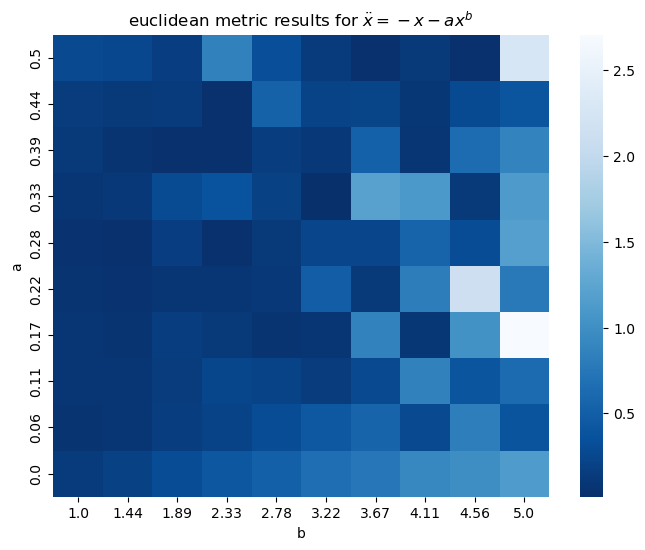

In [15]:
colormap = sns.color_palette("Blues_r", as_cmap=True)
plt.figure(figsize=(8,6))
sns.heatmap(np.flip(euclidean_grid, axis = 0),cmap = colormap, vmin = 0.0, vmax = 2.0)
plt.title(r"euclidean metric results for $\ddot{x} = -x -ax^b$")
plt.xlabel("b")
plt.ylabel('a')
plt.xticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(b_min,b_max,N),2))
plt.yticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(a_max,a_min,N),2))
plt.show()

In [18]:
CI_grid = np.zeros((N,N))
count = 0
for i,a in enumerate(np.linspace(a_min,a_max,N)):     # a will be y axis in grid
    for j,b in enumerate(np.linspace(b_min,b_max,N)): # b will be x axis in grid
        pdf_simple = lambda x,y: vps[count].pdf(np.array([[y,x]]))
        CI_grid[i,j] = CI_2D(vps[count],pdf_simple,param_values[count])
        print("vp" + str(count))
        count += 1
print(count)

vp0
vp1
vp2
vp3
vp4
vp5
vp6
vp7
vp8
vp9
vp10
vp11
vp12
vp13
vp14
vp15
vp16
vp17
vp18
vp19
vp20
vp21
vp22
vp23
vp24
vp25
vp26
vp27
vp28
vp29
vp30
vp31
vp32
vp33
vp34
vp35
vp36
vp37
vp38
vp39
vp40
vp41
vp42
vp43
vp44
vp45
vp46
vp47
vp48
vp49
vp50
vp51
vp52
vp53
vp54
vp55
vp56
vp57
vp58
vp59
vp60
vp61
vp62
vp63
vp64
vp65
vp66
vp67
vp68
vp69
vp70
vp71
vp72
vp73
vp74
vp75
vp76
vp77
vp78
vp79
vp80
vp81
vp82
vp83
vp84
vp85
vp86
vp87
vp88
vp89
vp90
vp91
vp92
vp93
vp94
vp95
vp96
vp97
vp98
vp99
100


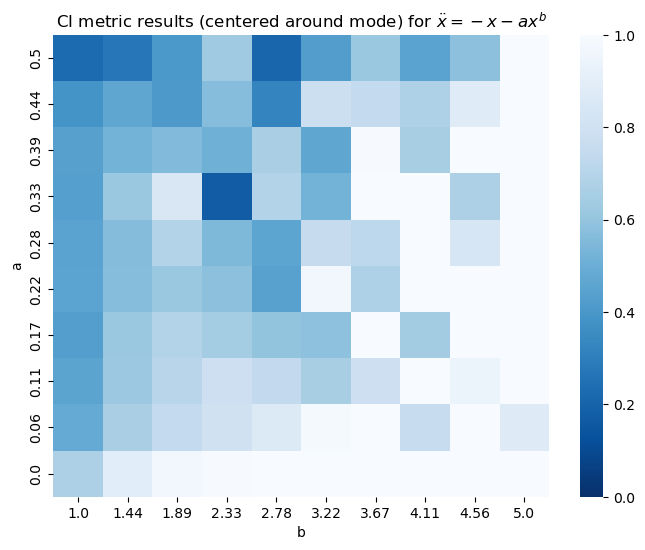

In [20]:
colormap = sns.color_palette("Blues_r", as_cmap=True)
plt.figure(figsize=(8,6))
sns.heatmap(np.flip(CI_grid, axis = 0),cmap = colormap, vmin = 0.0, vmax = 1.0)
plt.title(r"CI metric results (centered around mode) for $\ddot{x} = -x -ax^b$")
plt.xlabel("b")
plt.ylabel('a')
plt.xticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(b_min,b_max,N),2))
plt.yticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(a_max,a_min,N),2))
plt.show()